In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns

In [3]:
import os
#os.listdir('C:/Users/Chigozie/Desktop/data sheets/datacamp datafiles/')

In [5]:
data = pd.read_csv('C:/Users/Chigozie/Desktop/data sheets/datacamp datafiles/boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [14]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Creating a dataframe for the boston data

In [6]:
boston_data = pd.DataFrame(boston.data, columns = list(boston.feature_names)) #df of data
boston_target = pd.DataFrame(boston.target, columns = ['MEDV']) #df of target
boston_df = pd.concat([boston_data,boston_target],axis= 1) #concat of data and target 

### Concatenating the data and target and enclosing in a df

#### Prints as the one below
pd.DataFrame(boston_np, columns = (list(boston.feature_names)+['MEDV']))

In [7]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_np = np.concatenate([boston_data,boston_target], axis= 1)
boston_np_df = pd.DataFrame(boston_np, columns = columns)

### creating the feature and target variables

In [8]:
X = boston_np_df.drop('MEDV',axis =1 ).values

In [9]:
y = boston_np_df['MEDV'].values

### Importing the linear regression model from sklearn.linear_model

In [10]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
reg = LinearRegression()

In [13]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [14]:
print(reg.score(X_test, y_pred)) #this checks the accuracy of the model to predict the y (dependent variable)
print(reg.score(X_train, y_train))

1.0
0.7434997532004697


In [15]:
reg_score = mean_squared_error(y_test,y_pred)
#this returns the R^2 ie the amt of y that can be accounted by the dependent variable
#it mesures the proportion of the variability in y that can be accounted for by the linear rshp btw X and Y
reg_score

21.517444231177368

In [16]:
#validating with the cross_val_score metrics
cv_score = cross_val_score(reg, X, y, cv = 5)
np.mean(cv_score)

0.3532759243958778

### Using Ridge and Lasso for regularising the linear model

In [17]:
#instantiating the Ridge metrics
ridge = Ridge(alpha = 0.1, normalize = True)

In [18]:
#fitting the training data
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [19]:
#predicting the test data and finding the accuracy score
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test) 

0.6996938275127317

In [20]:
#instantiating the Lasso metrics
lasso = Lasso(alpha = 0.1, normalize = True)

In [21]:
#Fitting the training data to the lasso metrics
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
#Predicting the test data and finding the accuracy score
lasso_pred = lasso.predict(X_test)
lasso_score = lasso.score(X_test, y_test)
lasso_score

0.5950229535328548

## Using lasso to select impotant features for the model

In [23]:
#use the .coef_ attribute after fitting the model
lasso_coef = lasso.fit(X,y).coef_
featureNames = boston_np_df.drop('MEDV', axis =1).columns

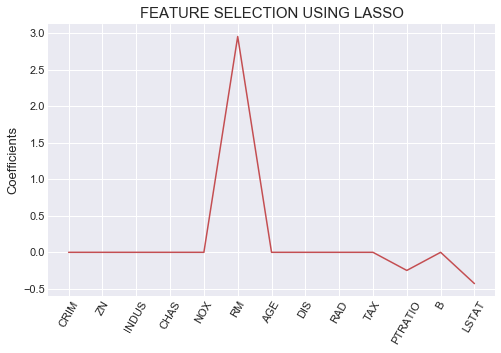

In [24]:
#Visualising the important features to predict y
sns.set()
plt.style.use('seaborn-dark')
plt.figure(figsize= [8,5])
plt.plot(range(len(featureNames)), lasso_coef, 'r-')
plt.xticks(range(len(featureNames)), featureNames, rotation = 60)
plt.ylabel('Coefficients', fontsize = 13)
plt.title('Feature selection using Lasso'.upper(), fontsize = 15)
plt.grid(True);

## Using the room feature given as the important feature to predict y

In [113]:
#selecting the room feature
features = boston_np_df.loc[:,['RM', 'PTRATIO', 'LSTAT']].values
features.shape
room_np = features[:,index].reshape(-1,1)

In [26]:
boston_np_df[['RM', 'PTRATIO', 'LSTAT', 'MEDV']].corr()

,RM,PTRATIO,LSTAT,MEDV
RM,1.000000,-0.355501,-0.613808,0.695360
PTRATIO,-0.355501,1.000000,0.374044,-0.507787
LSTAT,-0.613808,0.374044,1.000000,-0.737663
MEDV,0.695360,-0.507787,-0.737663,1.000000


In [105]:
#selecting the target variable, converting to a numpy array(.values) and reshaping
target = boston_np_df.MEDV.values
target.shape
MEDV_np = target.reshape(-1,1)
MEDV_np.shape

(506, 1)

### using linear regression model

In [37]:
#splitting to get the training and testing data
features_train,features_test,target_train, target_test = \
train_test_split(features,target, test_size = 0.3, random_state = 42)

In [39]:
#fitting the training data, predicting the test data and calculating the accuracy score of the regression model
# this isn't the best accuracy score for the regression model, rather the mean 
reg.fit(features_train,target_train)
ypred = reg.predict(features_test)
print(reg.score(features_test, target_test))
print(reg.score(features_train, target_train))

0.650904156861472
0.6850018441906278


In [40]:
#calculating the R^2 using the mean squared error to calculate the variability of y that is explained by the model
mean_squared_error(target_test,ypred)

26.01221192212625

In [51]:
features[:,0].shape

(506,)

In [112]:
boston_np_df.RM.shape

(506,)

(50, 1)

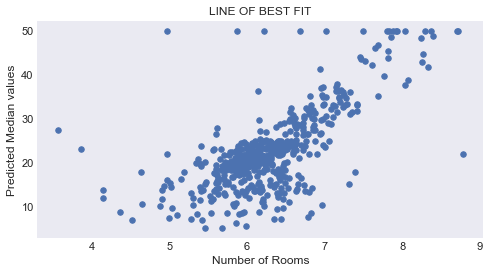

In [110]:
#fitting the line of goodness fit
plt.figure(figsize = [8,4])
prediction_space = np.linspace(np.min(room_np), np.max(room_np)).reshape(-1,1)
plt.scatter(room_np,MEDV_np, s = 30,c = 'b')
#plt.plot(prediction_space, reg.predict(prediction_space), 'k')
plt.xlabel('Number of Rooms')
plt.ylabel('Predicted Median values')
plt.title('Line of best fit'.upper());
prediction_space.shape

In [236]:
#Fitting and predicting the Regression model using the lasso metrics

lasso.fit(room_train,medv_train).predict(room_test)
print(lasso.score(room_test,medv_test)* 100)
print(mean_squared_error(medv_test, lasso.predict(room_test)))

41.83245810385473
43.34243608255383


In [235]:
#using ridge to regularise the linear regression model
ridge.fit(room_train,medv_train).predict(room_test)
print(ridge.score(room_test,medv_test)* 100)
print(mean_squared_error(medv_test, ridge.predict(room_test)))

45.461913131426556
40.63801678926647


In [237]:
#using the cross_val_score to validate the model
(cross_val_score(reg, rm_np, MEDV_np, cv = 2))

array([0.56450346, 0.16327159])

In [424]:
def lasso_ridge_accuracy_score():
    #This checks the best alpha (n) value for the model
    alphas = np.linspace(0.1,0.9,9)
    ridge_accuracy = np.empty(len(alphas))
    lasso_accuracy = np.empty(len(alphas))
    for i, n in enumerate (alphas):
        room_train,room_test,medv_train, medv_test = \
                                            train_test_split(rm_np,MEDV_np, test_size = 0.3, random_state = 42)
        ridge = Ridge(alpha = n, normalize = True)
        lasso = Lasso(alpha= n, normalize= True)
        ridge.fit(room_train, medv_train)
        ridge.predict(room_test)
        lasso.fit(room_train, medv_train).predict(room_test)
        
        ridge_accuracy[i] = ridge.score(room_test,medv_test)
        lasso_accuracy[i] = lasso.score(room_test,medv_test)
        
    plt.plot(alphas, ridge_accuracy, 'rs-', label = 'Ridge Accuracy')
    plt.plot(alphas, lasso_accuracy, 'go-', label = 'Lasso Accuracy')
    plt.xlim([0,1])
    plt.ylim([-0.1, 0.5])
    plt.grid(True)
    plt.legend(loc = 5);

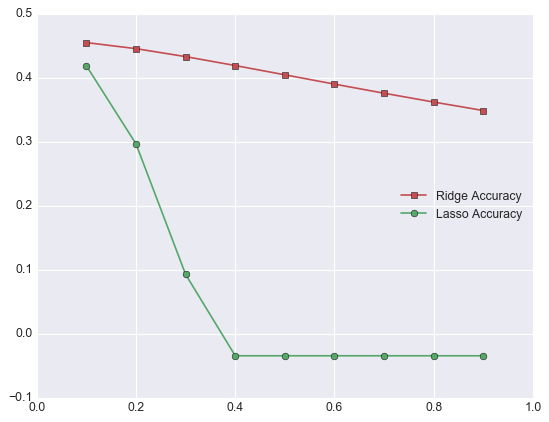

In [391]:
#calling the function
lasso_ridge_accuracy_score_()